# Real Time Detection

In [120]:
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

model = load_model('enjn.h5')

cap = cv2.VideoCapture(0)



faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



while(True):
    
    ret , img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    
    faces = faceCascade.detectMultiScale(img, 1.5, 5,minSize = (30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in faces:
        
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        
        detected = img[int(y):int(y+h), int(x):int(x+w)] 
        detected = cv2.cvtColor(detected, cv2.COLOR_BGR2GRAY) 
        detected = cv2.resize(detected, (48, 48)) 
        cv2.imwrite("faces/"+str(x+w)+".jpg",detected)
        pixels = image.img_to_array(detected)
        pixels = np.expand_dims(pixels, axis = 0)
      #  pixels = np.expand_dims(pixels, -1)
        pixels =pixels.astype('float32')
        pixels /= 255;
        
        
        predicted = model.predict(pixels);
        
        
        
        indexed = np.argmax(predicted[0])
        
        emotion = emotions[indexed]
        
        cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    cv2.imshow('img',img)    
        
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
     
cap.release();
cv2.destroyAllWindows()

# Image Upload

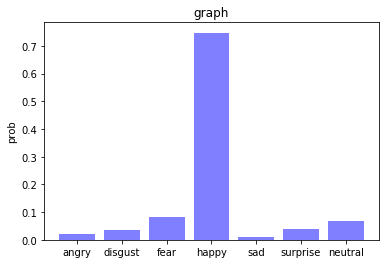

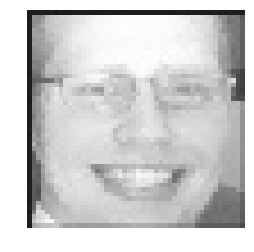

In [127]:
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('enjn.h5')

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

path = 'faces/496.jpg'
img_orj = image.load_img(path)
img = image.load_img(path, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
x /= 255

pre = model.predict(x)

y_pos = np.arange(len(emotions))
    
plt.bar(y_pos, pre[0], align='center', alpha=0.5, color='blue')
plt.xticks(y_pos, emotions)
plt.ylabel('prob')
plt.title('graph')
plt.show()

#2
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
plt.axis('off')
plt.gray()
plt.imshow(img)

plt.show()

In [60]:
pre[0]

array([  1.84701657e-10,   5.05976416e-09,   9.99999881e-01,
         4.04740810e-08,   2.27710331e-08,   9.88002924e-08,
         5.08482358e-08], dtype=float32)

In [111]:
import cv2
import numpy as np
from keras.models import load_model

# laptop camera
# rgb = cv2.VideoCapture(0)

# droidcam android
rgb = cv2.VideoCapture(0)


# pre - trinaed xml file for detecting faces
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX


# loading saved cnn model
model = load_model('ennerakshiku.h5')


# predicting face emotion using saved model
def get_emo(im):
    im = im[np.newaxis,  :, :,np.newaxis,]
    res = model.predict_classes(im,verbose=0)
    emo = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
    return emo[res[0]]


# reshaping face image
def recognize_face(im):
    im = cv2.resize(im, (48, 48))
    return get_emo(im)


while True:
    _, fr = rgb.read()
    flip_fr = cv2.flip(fr,1)
    gray = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        fc = fr[y:y+h, x:x+w, :]
        gfc = cv2.cvtColor(fc, cv2.COLOR_BGR2GRAY)
        out = recognize_face(gfc)
        cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        flip_fr = cv2.flip(fr,1)
        cv2.putText(flip_fr, out, (30, 30), font, 1, (255, 255, 0), 2)
    
    cv2.imshow('rgb', flip_fr)

    # press esc to close the window
    k = cv2.waitKey(1) & 0xEFFFFF
    if k==27:   
        break
    elif k==-1:
        continue
    else:
        # print k
        continue

cv2.destroyAllWindows()

In [112]:
rgb.release()